## Brief introduction to `matplotlib`

In [1]:
import matplotlib.pyplot as plt
import numpy as np

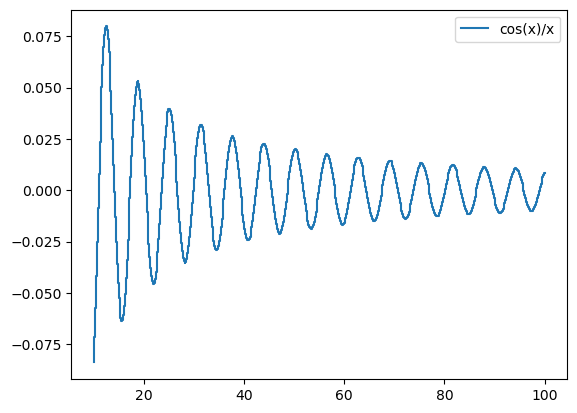

In [2]:
# Create synthetic data
x: np.ndarray = np.linspace(10, 100, 500)
y: np.ndarray = np.cos(x) / x

# Prepare the visualization 
plt.step(x, y, label='cos(x)/x', where='mid')
plt.legend()
plt.show()

## Smoothing time series

In [3]:
import dateutil.parser as dparser
import matplotlib.pyplot as plt
import numpy as np
from pylab import *

Create the `smooth()` function that will send as parameters the original time series and the window's length

In [4]:
def smooth(x, window_len):
    s = np.r_[2 * x[0] - x[window_len-1::-1], 
              x, 2*x[-1] - x[-1:-window_len:-1]]
    w = np.hamming(window_len)
    y = np.convolve(w / w.sum(), s, mode='same')
    return y[window_len:-window_len+1]

Obtain the labels for the **X** axis

In [5]:
x: np.ndarray = np.genfromtxt(
    fname="./Gold.csv",
    dtype='object',
    delimiter=',',
    skip_header=1,
    usecols=(0),
    converters={0: dparser.parse}
)

print(f"Lenght of `x`: {len(x)}")
x[:2]

Lenght of `x`: 125


array([datetime.datetime(2003, 1, 31, 0, 0),
       datetime.datetime(2003, 2, 28, 0, 0)], dtype=object)

Obtain the original time series

In [6]:
originalTS: np.ndarray = np.genfromtxt(
    fname="./Gold.csv",
    skip_header=1,
    dtype=None,
    delimiter=',',
    usecols=(1)
)

print(f"Lenght of `originalTS`: {len(originalTS)}")
originalTS[:2]

Lenght of `originalTS`: 125


array([367.5, 347.5])

Apply the `smooth()` method

In [7]:
smoothedTS = smooth(originalTS, len(originalTS))

print(f"Lenght of `smoothedTS`: {len(smoothedTS)}")
smoothedTS[:5]

Lenght of `smoothedTS`: 125


array([370.04872108, 375.12242215, 380.17176298, 385.1912299 ,
       390.16737923])

Plot the two series 

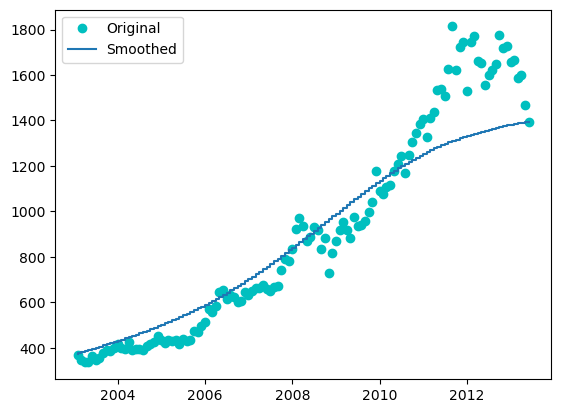

In [8]:
plt.step(x, originalTS, 'co')
plt.step(x, smoothedTS)
plt.legend(['Original', 'Smoothed'])
plt.show()

## Linear regression

In [9]:
from pylab import *
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Read CSV file from GitHub using `pandas`, and select just one independent feature to perform the regression
- Reference: [stackoverflow.com](https://stackoverflow.com/questions/55240330/how-to-read-csv-file-from-github-using-pandas)
- Data description: [lib.stat.cmu.edu](https://lib.stat.cmu.edu/datasets/boston)

In [10]:
url: str = "https://raw.githubusercontent.com/selva86/datasets/refs/heads/master/BostonHousing.csv"
houses: pd.DataFrame = pd.read_csv(url)

houses.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


- Select number of rooms (`rm`) as predictive feature
- Select house prices (`medv`) as target feature

In [11]:
X: np.ndarray = houses['rm'].values.reshape(-1, 1)
y: np.ndarray = houses['medv'].values

Split the dataset into a training set and a test subset 

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

print(f"X_train shape: {X_train.shape}")
print(f"X_test  shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test  shape: {y_test.shape}")

X_train shape: (339, 1)
X_test  shape: (167, 1)
y_train shape: (339,)
y_test  shape: (167,)


Select the algorithm for the `LinearRegression()` forecast, and then train the algorithm with the training set using the `fit()` function

Intercept: -34.22235234632533
Coef: [9.03907314]


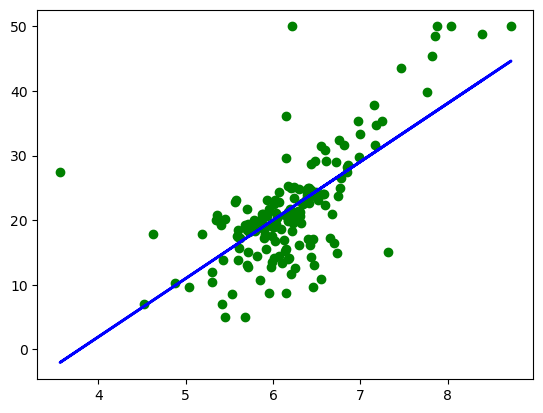

In [13]:
lreg = linear_model.LinearRegression()
lreg.fit(X_train, y_train)

# Show weights
print(f"Intercept: {lreg.intercept_}")
print(f"Coef: {lreg.coef_}")

# Plot the results
plt.scatter(X_test, y_test, color='green')
plt.plot(X_test, lreg.predict(X_test), color='blue', linewidth=2)
plt.show()

## Nonlinear regressions

#### Kernel Ridge Regressions

In [14]:
import numpy as np
from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics.pairwise import rbf_kernel
import matplotlib.pyplot as plt

Define seed for the random number generation

In [15]:
np.random.seed(0)

Load the historical gold prices

In [16]:
targetValues: np.ndarray = np.genfromtxt(
    fname="./Gold.csv",
    skip_header=1,
    dtype=None,
    delimiter=',',
    usecols=(1)
)

print(f"Lenght of `targetValues`: {len(targetValues)}")
targetValues[:5]

Lenght of `targetValues`: 125


array([367.5, 347.5, 334.9, 336.8, 361.4])

Create a new array with `125` training points, one for each record of `targetValues`, representing the monthly gold price from January 2003 to May 2013

In [17]:
trainingPoints: np.ndarray = np.arange(len(targetValues)) \
                               .reshape(-1, 1)

print(f"Lenght of `trainingPoints`: {len(trainingPoints)}")
# trainingPoints[:5]

Lenght of `trainingPoints`: 125


Create another array with `126` test points representing the original `125` points
in `targetValues`, and including an extra point for our predicted value for June 2013

In [18]:
testPoints: np.ndarray = np.arange(len(targetValues)+1) \
                           .reshape(-1, 1)

print(f"Lenght of `testPoints`: {len(testPoints)}")
# testPoints[:5]

Lenght of `testPoints`: 126


Create the training kernel matrix (`knl`) and testing kernel matrix (`knlTest`)

In [19]:
# Compute the Gaussian (RBF) kernel matrices
sigma: float = 1.0  # Kernel width parameter
gamma: float = 1 / (2 * sigma**2)

knl = rbf_kernel(trainingPoints, trainingPoints, gamma=gamma)
knlTest = rbf_kernel(testPoints, trainingPoints, gamma=gamma)

Instantiate `KernelRidge` object and compute the regression coefficients using the training kernel matrix and the target values as a parameter

In [20]:
# Since we're providing a precomputed kernel, set kernel='precomputed'
model = KernelRidge(alpha=0.01, kernel='precomputed')

# Fit the model using the training kernel matrix and target values
model.fit(knl, targetValues)
# Predict using the testing kernel matrix
resultPoints = model.predict(knlTest)

resultPoints[-5:]

array([1587.6997359 , 1585.75371381, 1469.78154841, 1381.91754007,
        766.5565061 ])

Plot the two time series of target values and result points

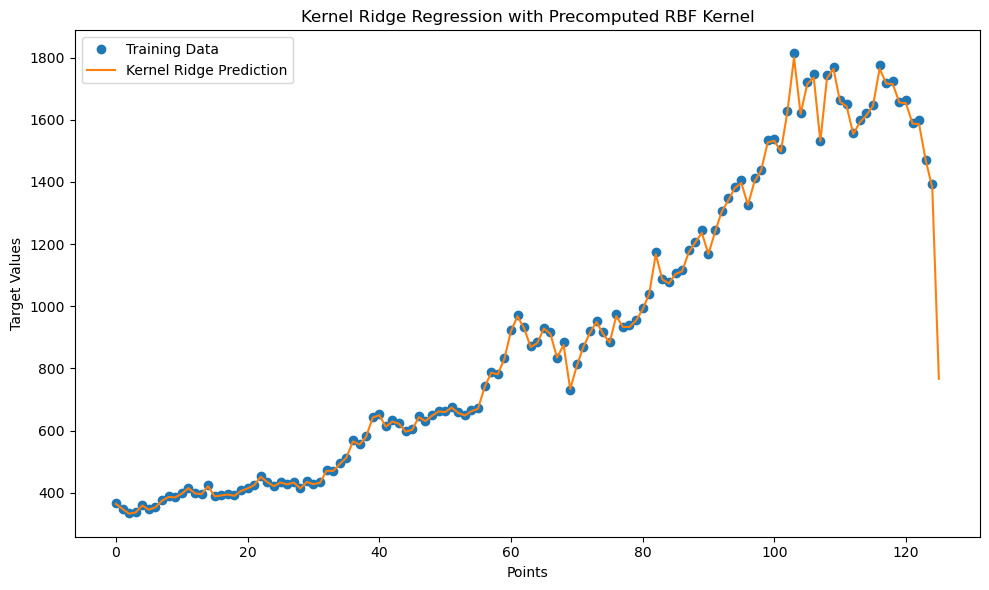

In [21]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(trainingPoints, targetValues, 'o', label='Training Data')
plt.plot(testPoints, resultPoints, '-', label='Kernel Ridge Prediction')
plt.xlabel('Points')
plt.ylabel('Target Values')
plt.title('Kernel Ridge Regression with Precomputed RBF Kernel')
plt.legend()
plt.tight_layout()
plt.show()

#### Smoothing the gold prices time series

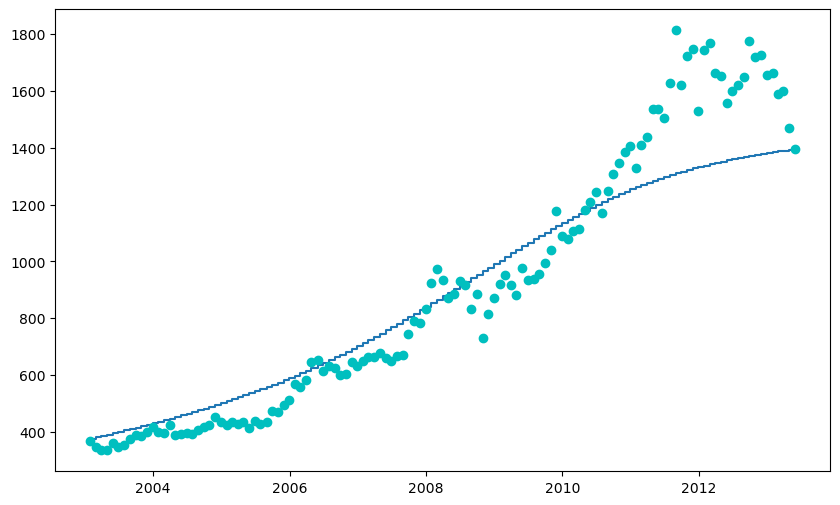

In [22]:
x = np.genfromtxt("./Gold.csv", dtype='object', delimiter=',', 
                  skip_header=1, usecols=(0), 
                  converters = {0: dparser.parse})

y = np.genfromtxt("Gold.csv", skip_header=1, dtype=None,
                  delimiter=',', usecols=(1))

y2 = smooth(y, len(y))

plt.figure(figsize=(10, 6))
plt.step(x, y2)
plt.step(x, y, 'co')
plt.show()

#### Predicting in the smoothed time series

[1380.35443519 1378.9189268  1389.27162701 1380.99457562  754.54635936]


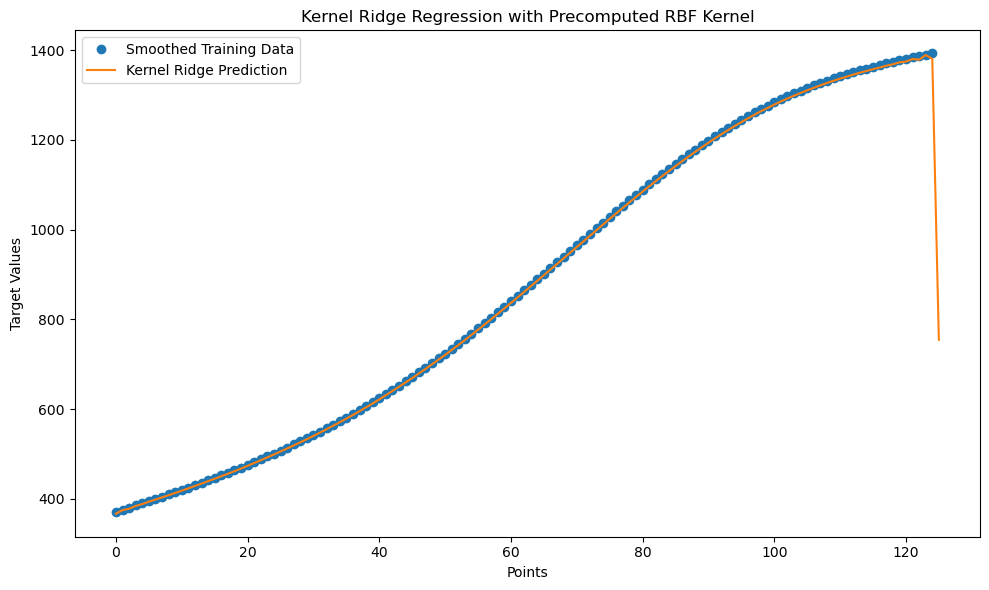

In [23]:
# Read the data and smooth the target values
y = np.genfromtxt("Gold.csv", skip_header=1, dtype=None,
                  delimiter=',', usecols=(1))
targetValues = smooth(y, len(y))

# Set random seed
np.random.seed(10)

# Generate training and test points
trainingPoints = np.arange(125).reshape(-1, 1)
testPoints = np.arange(126).reshape(-1, 1)

# Compute the Gaussian (RBF) kernel matrices
sigma: float = 1.0  # Kernel width parameter
gamma: float = 1 / (2 * sigma**2)

# Train the model and predict the target values
model = KernelRidge(alpha=0.01, kernel='rbf', gamma=gamma)
model.fit(trainingPoints, targetValues)
resultPoints = model.predict(testPoints)

# Print the last 5 predicted values
print(resultPoints[-5:])

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(trainingPoints, targetValues, 'o', label='Smoothed Training Data')
plt.plot(testPoints, resultPoints, '-', label='Kernel Ridge Prediction')
plt.xlabel('Points')
plt.ylabel('Target Values')
plt.title('Kernel Ridge Regression with Precomputed RBF Kernel')
plt.legend()
plt.tight_layout()
plt.show()